# **Regressor Algorithms**

The experiments conducted using different feature selections methods such as PCA, Correlation, RandomForest based feature selections and the last was without feature selection. Experiment algorithms are as follows:

- SVM Regressor 
- Gradient Boost Regressor 
- Cat Boost Regressor 
- XGBoost Regressor 
- K-NN Regressor

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.9MB 57kB/s 


In [66]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score,roc_curve, classification_report
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

import timeit
from warnings import filterwarnings
filterwarnings('ignore')

### **Data Importing**

In [ ]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/Odevler/HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


## 1. **Data Statistics**

In [ ]:
data.shape

(6167, 136)

### **1.1. Describe Dataset**

In [ ]:
describe(data)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,11.772164,11.756105,-0.268040,-0.723528,-0.444300,-25.970975,24.945192,0.002215,-0.002264,-0.000024,1.048592,0.913289,1.596028,1.102192,-0.276875,-3.087097,-5.202559,-6.191402,-8.376898,-12.298849,-0.142528,3.493271,-1.071197,0.041349,0.099724,0.198962,0.296579,0.342792,0.377493,0.460353,...,-0.000032,-0.422692,95.137008,1.152460,-0.674508,80.624985,0.980187,68.391460,-0.000074,24.704677,-0.167167,15.757278,-0.000022,0.127180,-0.014782,-0.000006,-0.006399,1.210483,-0.000001,0.259444,0.145690,-49.281281,0.508078,-0.011978,-0.000038,0.000004,-0.000004,0.985568,0.099238,0.239987,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,4.488712,2.707619,8.923976,19.028597,11.028702,27.775290,24.669109,0.001415,0.001340,0.000615,66.642196,94.129876,107.442006,113.192879,117.337570,122.636373,123.710650,121.221664,118.771328,118.717178,32.933895,0.765103,20.824311,6.258027,9.216991,12.078004,14.736603,17.107677,21.239270,24.943979,...,0.000068,0.439721,18.305353,0.222516,0.778421,38.593195,0.469599,46.199740,0.000133,35.950863,0.471591,31.778804,0.000076,0.373173,0.088771,0.000049,0.052501,9.494788,0.000024,5.087360,3.279205,29.026477,21.591722,5.931067,0.002144,0.015594,0.015438,29.168401,9.843004,15.310151,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,3.333333,5.177500,-58.000000,-105.000000,-58.000000,-282.000000,-39.000000,0.000028,-0.012656,-0.004341,-133.333333,-166.666667,-331.567467,-392.609182,-407.738948,-539.934734,-489.309247,-529.869160,-483.426495,-401.794355,-88.900747,1.000000,-59.491496,-45.000000,-66.000000,-73.000000,-79.000000,-73.000000,-76.000000,-85.000000,...,-0.000742,-1.924803,0.000000,0.000000,-3.017206,0.000000,0.000000,0.000000,-0.001550,0.000000,-2.828137,0.000000,-0.000609,0.000000,-1.270209,-0.000639,-0.637499,0.000000,-0.000780,0.000000,0.000000,-100.000000,-81.903204,-75.406870,-0.018918,-0.106756,-0.090735,-98.000000,-81.000000,-83.000000,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-1

### **1.2. Categoric and Numeric variables Analysis**

In [ ]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

In [ ]:
sortDifferentCategory(data)

[['ind_109', 2],
 ['ind_40', 6],
 ['ind_82', 6],
 ['ind_217', 6],
 ['ind_28', 7],
 ['ind_349', 7],
 ['ind_8', 15],
 ['ind_9', 15],
 ['ind_351', 17],
 ['ind_352', 17],
 ['ind_70', 18],
 ['ind_67', 22],
 ['ind_344', 22],
 ['ind_83', 25],
 ['ind_10', 29],
 ['ind_77', 37],
 ['ind_61', 38],
 ['ind_74', 42],
 ['ind_71', 46],
 ['ind_58', 50],
 ['ind_122', 52],
 ['ind_65', 55],
 ['ind_62', 64],
 ['ind_347', 69],
 ['ind_42', 71],
 ['ind_334', 71],
 ['ind_19', 83],
 ['ind_21', 84],
 ['ind_52', 90],
 ['ind_136', 91],
 ['ind_134', 93],
 ['ind_43', 94],
 ['ind_56', 102],
 ['ind_407', 103],
 ['ind_345', 108],
 ['ind_44', 109],
 ['ind_45', 126],
 ['ind_124', 128],
 ['ind_53', 131],
 ['ind_116', 131],
 ['ind_46', 135],
 ['ind_418', 139],
 ['ind_20', 141],
 ['ind_410', 143],
 ['ind_234', 157],
 ['ind_47', 159],
 ['ind_5', 162],
 ['ind_6', 162],
 ['ind_48', 175],
 ['ind_23', 177],
 ['ind_49', 189],
 ['ind_22', 192],
 ['ind_406', 200],
 ['ind_128', 201],
 ['ind_324', 241],
 ['ind_309', 249],
 ['ind_50', 

In [ ]:
data.groupby("ind_40").count()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_40,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
3,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
4,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,...,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594
5,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
6,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [ ]:
data.groupby("ind_420").count().tail(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_420,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
288,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
290,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


### **1.3. NULL Value Checking**

In [ ]:
nulldata_check(data).sort_values(by="count",ascending=False).head(7)

,count,percentage
90_target,0,0.0
ind_416,0,0.0
ind_404,0,0.0
ind_406,0,0.0
ind_407,0,0.0
ind_410,0,0.0
ind_412,0,0.0


# **2. Data Preprocessing**

### **2.1. Noise data cleaning**

In [ ]:
#data["ind_420"] = data["ind_420"].replace("?", np.nan)
#data["ind_422"] = data["ind_422"].replace("?", np.nan)
data = data.drop(["ind_420", "ind_422"],axis=1)

### **2.2. Dummy Transformation**

In [ ]:
data_dummy = dummy_df(data, ["ind_109"])
data_dummy2 = dummy_df(data, ["ind_109","ind_40"])

num, cat = numeric_categoric_variable(data_dummy)
data_dummy.head()

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0


### **2.3. Normalization (Min-Max)**

In [ ]:
data_norm_20target = data_dummy.drop(["50_target", "90_target"],axis=1)
data_minmax_20target = normalization_minmax(data_norm_20target, "20_target")

data_norm_50target = data_dummy.drop(["20_target", "90_target"],axis=1)
data_minmax_50target = normalization_minmax(data_norm_50target, "50_target")

data_norm_90target = data_dummy.drop(["20_target", "50_target"],axis=1)
data_minmax_90target = normalization_minmax(data_norm_90target, "90_target")


data_minmax_50target.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,50_target,ind_109_GREEN,ind_109_RED
0,0.724638,0.714976,1.0,0.857143,0.571429,0.828604,0.971259,0.277947,0.303537,0.265448,0.235051,0.179402,0.652174,0.718563,0.788889,0.892744,0.443925,0.141716,0.786663,0.409832,1.0,0.781077,0.719145,0.625250,0.671936,0.692948,0.648437,0.653166,0.741258,0.759518,0.687309,0.4,0.722469,0.416667,0.333333,0.329032,0.358025,0.308642,0.225989,0.234375,...,0.981941,0.207870,0.965460,0.954773,0.749123,0.979995,0.960004,0.973850,0.960129,0.120723,0.944473,0.210376,0.851232,0.960087,0.748810,1.0,1.0,0.0,1.0,0.0,0.0,0.962687,0.200778,0.366515,0.499814,0.765524,0.234476,0.205323,0.358025,0.278607,0.555085,0.007097,0.522158,0.712766,1.0,0.498547,0.787736,35.625252,1.0,0.0
1,0.748792,0.724638,1.0,0.785714,0.607143,0.854913,0.976297,0.127062,0.313808,0.279663,0.215299,0.184535,0.630435,0.694611,0.766667,0.892744,0.476636,0.143767,0.751886,0.390871,1.0,0.730082,0.709572,0.632615,0.680442,0.704576,0.658920,0.660565,0.746867,0.768796,0.724501,0.4,0.770980,0.406250,0.363636,0.316129,0.339506,0.296296,0.214689,0.218750,...,0.981941,0.208265,0.964990,0.954784,0.749248,0.979540,0.960037,0.973411,0.960129,0.119873,0.944500,0.208693,0.851232,0.960159,0.748935,1.0,1.0,0.0,1.0,0.0,0.0,0.986301,0.178270,0.368766,0.591050,0.716052,0.283948,0.190114,0.401235,0.258706,0.570000,0.002839,0.464355,0.680851,1.0,0.537088,0.773630,35.643013,1.0,0.0
2,0.777778,0.748792,1.0,0.714286,0.642857,0.866807,0.978490,0.094075,0.308102,0.281404,0.205782,0.188641,0.684783,0.718563,0.744444,0.886435,0.485981,0.146513,0.718925,0.373539,1.0,0.751730,0.675775,0.629793,0.683324,0.710758,0.666667,0.666294,0.750682,0.776575,0.670118,0.4,0.793685,0.427083,0.416667,0.335484,0.351852,0.302469,0.225989,0.223958,...,0.981941,0.208449,0.964777,0.954795,0.749307,0.979346,0.960069,0.973230,0.960129,0.119035,0.944513,0.207037,0.851232,0.960232,0.748993,1.0,1.0,0.0,1.0,0.0,0.0,0.957211,0.168856,0.389967,0.596402,0.567600,0.432400,0.190114,0.438272,0.263682,0.580332,0.009581,0.437380,0.680851,1.0,0.615169,0.776441,35.651301,1.0,0.0


# **3. Feature Selection**

### **3.1. Principal Component Analysis**

In [ ]:
data_pca_20target = featureselection_pca(data_minmax_20target, "20_target", 0.9)
data_pca_50target = featureselection_pca(data_minmax_50target, "50_target", 0.9)
data_pca_90target = featureselection_pca(data_minmax_90target, "90_target", 0.9)
data_pca_50target.head()

pca sonrası değişken sayısı:  19
pca sonrası değişken sayısı:  19
pca sonrası değişken sayısı:  19


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,50_target
0,-1.918783,0.126473,-0.295048,0.400703,-0.076268,0.371339,0.347380,-0.614152,0.282158,0.352373,-0.385728,0.818448,0.255718,-0.452354,-0.168721,0.117936,-0.221845,0.385469,-0.012100,35.625252
1,-2.043020,0.117548,-0.204928,0.347276,-0.056899,0.328800,0.365171,-0.610495,0.253421,0.346037,-0.296312,0.821816,0.245115,-0.469800,-0.207842,0.104446,-0.231889,0.383681,-0.007942,35.643013
2,-2.088737,0.072149,-0.135119,0.317724,-0.062843,0.280218,0.375154,-0.605005,0.232259,0.319001,-0.261715,0.788576,0.268427,-0.474156,-0.203423,0.089478,-0.246062,0.361119,-0.002372,35.651301
3,-2.203106,0.090405,-0.066407,0.261085,-0.005468,0.251994,0.388037,-0.587139,0.199041,0.326763,-0.170757,0.828007,0.252351,-0.480077,-0.183597,0.063912,-0.240448,0.327890,0.011579,0.000000
4,-2.528751,0.126773,0.046819,0.234280,0.029756,0.354077,0.427985,-0.621044,0.236388,0.310995,-0.077167,0.849048,0.119429,-0.508945,-0.242452,0.143253,-0.363971,0.486983,-0.044026,-35.727079


### **3.2. Correlation based Feature Selection**

In [ ]:
data_corr_20target = featureselection_corrcorr(data_minmax_20target, "20_target", 0.6, 8)
data_corr_50target = featureselection_corrcorr(data_minmax_50target, "50_target", 0.6, 8)
data_corr_90target = featureselection_corrcorr(data_minmax_90target, "90_target", 0.6, 8)
data_corr_90target.head()

,ind_316,ind_310,ind_14,ind_26,ind_330,ind_324,ind_332,ind_18,90_target
0,0.979995,0.207870,0.277947,0.786663,0.944473,0.960129,0.210376,0.179402,36.997753
1,0.979540,0.208265,0.127062,0.751886,0.944500,0.960129,0.208693,0.184535,37.016198
2,0.979346,0.208449,0.094075,0.718925,0.944513,0.960129,0.207037,0.188641,-37.024805
3,0.978964,0.208784,0.082468,0.684934,0.944537,0.960129,0.205407,0.193317,-37.040483
4,0.977335,0.210127,0.169212,0.632729,0.944631,0.960129,0.203802,0.215100,-37.103503


### **3.3. RandomForestRegressor based Feature Selection**

In [ ]:
def x_and_y(data_minmax, target):
  x= data_minmax.drop(target, axis=1)
  y = data_minmax[target]
  return x,y

In [ ]:
rf_params = {"max_depth": [2,5,7,8],
             "max_features": [3,4,5],
             "n_estimators": [50,100],
             "min_samples_split": [5,10]}

x,y = x_and_y(data_minmax_20target, "20_target")
data_rf_20target = featureselection_randomforest(x,y, "20_target", rf_params, 10) 

x,y = x_and_y(data_minmax_50target, "50_target")
data_rf_50target = featureselection_randomforest(x,y, "50_target", rf_params, 10) 

x,y = x_and_y(data_minmax_90target, "90_target")
data_rf_90target = featureselection_randomforest(x,y, "90_target", rf_params, 10) 


data_rf_50target.head()

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.2min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.2min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.2min finished


,ind_243,ind_228,ind_311,ind_313,ind_77,ind_309,ind_132,ind_237,ind_18,ind_71,50_target
0,0.957122,0.956983,0.965460,0.954773,0.690476,0.981941,0.294118,0.100052,0.179402,0.673469,35.625252
1,0.956949,0.956855,0.964990,0.954784,0.690476,0.981941,0.283224,0.090956,0.184535,0.673469,35.643013
2,0.956776,0.956728,0.964777,0.954795,0.690476,0.981941,0.278867,0.083377,0.188641,0.673469,35.651301
3,0.956602,0.956600,0.964379,0.954805,0.690476,0.981941,0.270153,0.076963,0.193317,0.673469,0.000000
4,0.956429,0.956473,0.962752,0.954816,0.690476,0.981941,0.226580,0.071466,0.215100,0.693878,-35.727079


# **4. Visualization**

### **4.1. Correlation HeatMap**

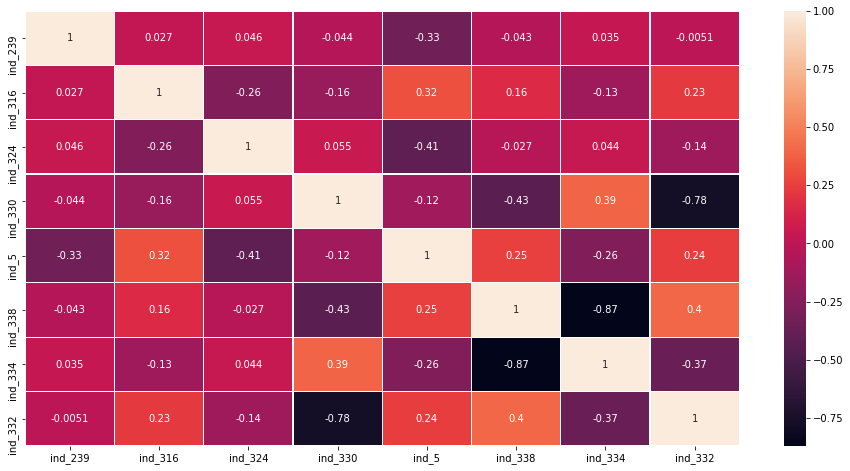

In [ ]:
heatmap(data_corr_20target.drop(["20_target"], axis=1))

In [ ]:
print("Most Correlated\n",correlation_df(data_corr_50target.drop(["50_target"],axis=1)).sort_values(by="Corr", ascending=False).head(5),"\n")
print("Less Correlated\n",correlation_df(data_corr_50target.drop(["50_target"],axis=1)).sort_values(by="Corr", ascending=True).head(5),"\n")

Most Correlated
    feature1 feature2      Corr
23  ind_330  ind_332  0.775937
11   ind_14   ind_26  0.485883
6     ind_5  ind_324  0.409430
29   ind_26   ind_18  0.361721
20  ind_310   ind_18  0.296947 

Less Correlated
    feature1 feature2      Corr
27   ind_26  ind_332  0.001387
4     ind_5   ind_26  0.012802
1     ind_5   ind_14  0.014502
2     ind_5  ind_310  0.020973
13   ind_14  ind_324  0.027027 



### **4.2. Scatter Plot**

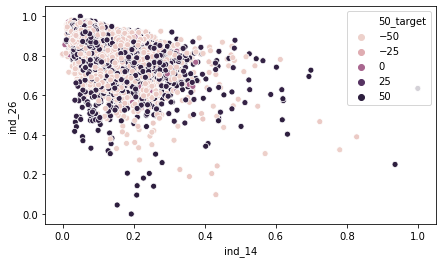

In [ ]:
scatterplot("ind_14", "ind_26", "50_target", data_corr_50target)

### **4.3. Box Plot (Five Numbers Summary)**

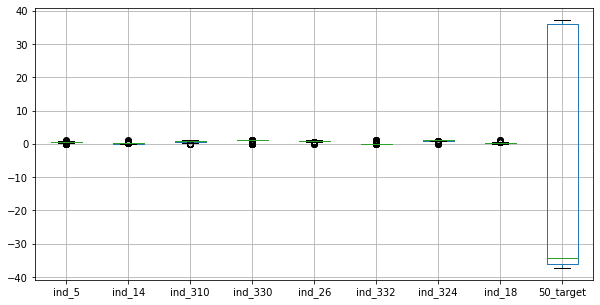

In [ ]:
boxplot(data_corr_50target)

### **4.4. Histogram (Distribution)**

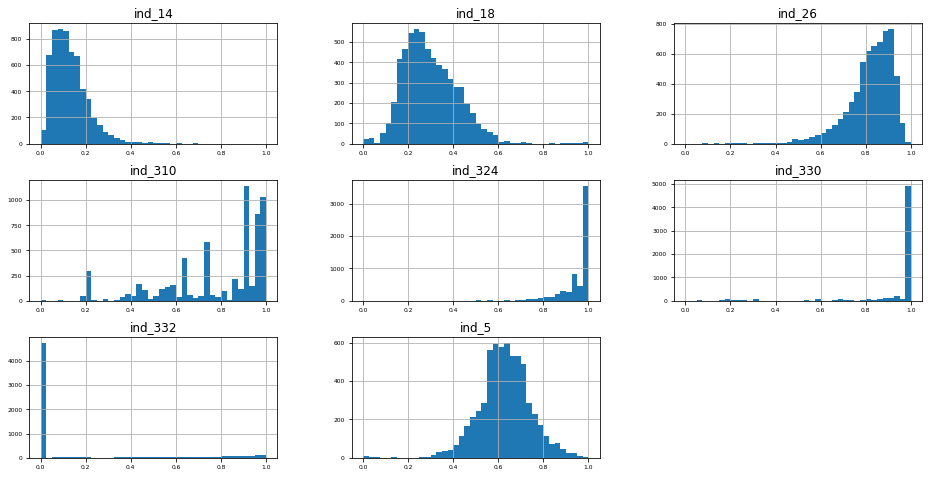

In [ ]:
histogram(data_corr_50target.drop(["50_target"],axis=1), figsize=(16,8))

# **5. Modelling (Algorithms)**
- SVM Regressor
- Gradient Boosting Regressor
- Cat Boost Regressor
- XGBoost Regressor

## **5.1. SVM Regressor**

### **5.1.1. PCA based FS**

In [68]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_20target, "20_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_50target, "50_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_90target, "90_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  257.2785372825233
RMSE:  16.03990452847283
MAE :  14.31183249373937


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1586.2790423125202
RMSE:  39.828118739309296
MAE :  33.578850751879926


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1916.8307547456357
RMSE:  43.781625766360435
MAE :  33.558470954521624




### **5.1.2. Correlation based FS**

In [69]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  255.90250730929296
RMSE:  15.996953063295928
MAE :  14.583242249725165


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1788.9700054697657
RMSE:  42.29621738961731
MAE :  30.916080523315173


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  2172.7729575628027
RMSE:  46.613012749261365
MAE :  32.0892006789886




#### **5.1.3. RandomForest based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_20target, "20_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_50target, "50_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_90target, "90_target")
svr_model = SVR().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  246.6033635226488
RMSE:  15.70360988825973
MAE :  14.244759396370892


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  1736.4221419422427
RMSE:  41.67039886948819
MAE :  33.0119141620397


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  1838.8753362687155
RMSE:  42.88210974600848
MAE :  33.07388771944352




## **5.2. Gradient Boosting Regressor**

#### **5.2.1. PCA based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_20target, "20_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_50target, "50_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_90target, "90_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  225.70446436906158
RMSE:  15.02346379398112
MAE :  14.396105749972266


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1235.137064365398
RMSE:  35.14451684637872
MAE :  33.279563935124514


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1388.3150359898602
RMSE:  37.26009978502285
MAE :  34.9871403678532


#### **5.2.2. Correlation based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  215.70443696433725
RMSE:  14.686879755902451
MAE :  14.15109967129135


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1320.039843293498
RMSE:  36.332352570312565
MAE :  33.10348466420469


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1465.756192298115
RMSE:  38.28519547159339
MAE :  35.198734983571974


#### **5.2.3. RandomForest based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_20target, "20_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_50target, "50_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_90target, "90_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  229.72670691205883
RMSE:  15.156738003675422
MAE :  14.455384206251779


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  1289.375978883232
RMSE:  35.907881849020725
MAE :  34.257477587288925


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  1577.9334088584135
RMSE:  39.72320995159396
MAE :  36.90755249070258


#### **5.2.4. Without Feature Selection**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_20target, "20_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_50target, "50_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_90target, "90_target")
svr_model = GradientBoostingRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  241.43388967892596
RMSE:  15.538143057615539
MAE :  14.6680624226593


(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  1759.0520842410115
RMSE:  41.941054877542264
MAE :  35.39330818891518


(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  1759.3677250449903
RMSE:  41.944817618449484
MAE :  35.97361003149436


## **5.3. Cat Boost Regressor**

### **5.3.1. PCA based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_20target, "20_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_50target, "50_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_90target, "90_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  244.22485508477286
RMSE:  15.62769513027346
MAE :  14.336241137687471


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1390.7214079968198
RMSE:  37.292377344395994
MAE :  33.52816453913393


(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1579.8613026741
RMSE:  39.74746913545692
MAE :  35.29479624541436


#### **5.3.2. Correlation based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  238.54953144652134
RMSE:  15.445048768020168
MAE :  14.22157325850185


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1347.2002977619268
RMSE:  36.70422724648929
MAE :  31.780926645830778


(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1622.5621083260703
RMSE:  40.28103906711035
MAE :  34.84690052881042


#### **5.3.3. RandomForest based FS**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_20target, "20_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_50target, "50_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_90target, "90_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  259.7539222485677
RMSE:  16.116883143107035
MAE :  14.612433495630803


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  1690.8067915327351
RMSE:  41.119421099192714
MAE :  35.92557903283756


(4625, 10) (1542, 10) (4625,) (1542,)
MSE :  2062.872705474564
RMSE:  45.418858478329945
MAE :  39.0386932913851


#### **5.3.4. Without Feature Selection**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_20target, "20_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_50target, "50_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_90target, "90_target")
svr_model = CatBoostRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  267.8615428634761
RMSE:  16.366476189561272
MAE :  14.90056734690578


(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  1583.0269168907005
RMSE:  39.78727078967217
MAE :  36.38018082853497


(4625, 132) (1542, 132) (4625,) (1542,)
MSE :  1975.7094164657503
RMSE:  44.448952928789566
MAE :  39.803310856187295


## **5.4. XGBoost Regressor**

### **5.4.1. PCA based Feature Selecction**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_20target, "20_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_50target, "50_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_90target, "90_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 19) (1542, 19) (4625,) (1542,)
[13:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  224.36918515363078
RMSE:  14.978958079707372
MAE :  14.379980638145124


(4625, 19) (1542, 19) (4625,) (1542,)
[13:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1225.3984249262833
RMSE:  35.00569132193054
MAE :  32.969518248391346


(4625, 19) (1542, 19) (4625,) (1542,)
[13:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1368.7924913230922
RMSE:  36.997195722420535
MAE :  34.79889231638018


### **5.4.2. Correlation based Feature Selecction**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 8) (1542, 8) (4625,) (1542,)
[13:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  216.45357142678031
RMSE:  14.712361177825276
MAE :  14.186417895092845


(4625, 8) (1542, 8) (4625,) (1542,)
[13:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1328.1935471085596
RMSE:  36.44438978921941
MAE :  33.38068621796823


(4625, 8) (1542, 8) (4625,) (1542,)
[13:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1435.1534152671534
RMSE:  37.88341873784827
MAE :  35.15733807086509


### **5.4.3. RandomForest based Feature Selecction**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_20target, "20_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_50target, "50_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_90target, "90_target")
svr_model = XGBRegressor(verbose=0).fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 10) (1542, 10) (4625,) (1542,)
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  225.779470315293
RMSE:  15.025959879997451
MAE :  14.38252709843193


(4625, 10) (1542, 10) (4625,) (1542,)
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1411.7437498680347
RMSE:  37.57317859681338
MAE :  34.63923526298101


(4625, 10) (1542, 10) (4625,) (1542,)
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1759.495762174498
RMSE:  41.94634384752142
MAE :  36.94626933460812


### **5.4.4. Without Feature Selecction**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_20target, "20_target")
svr_model = XGBRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_50target, "50_target")
svr_model = XGBRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)
print("\n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax_90target, "90_target")
svr_model = XGBRegressor().fit(xtrain, ytrain)
y_pred = svr_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

(4625, 132) (1542, 132) (4625,) (1542,)
[13:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  243.09865795975014
RMSE:  15.59162140252739
MAE :  14.752948998289002


(4625, 132) (1542, 132) (4625,) (1542,)
[13:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1677.6767206031373
RMSE:  40.95945215213623
MAE :  34.7517379925841


(4625, 132) (1542, 132) (4625,) (1542,)
[13:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1795.755433366625
RMSE:  42.376354649339824
MAE :  36.74360825515812


## **5.5. K-NN Regressor**

### **5.4.4. PCA based Feature Selection**

In [72]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_20target, "20_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_50target, "50_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_pca_90target, "90_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  255.53091325470731
RMSE:  15.985334317889862
MAE :  13.748522829364461
/n
(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1539.0957005439705
RMSE:  39.23131020682295
MAE :  33.55937459172244
/n
(4625, 19) (1542, 19) (4625,) (1542,)
MSE :  1703.4092382378474
RMSE:  41.27237863556991
MAE :  35.10585017671985
/n


### **5.4.2. Correlation based Feature Selection**

In [73]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  284.9256334494302
RMSE:  16.879740325296186
MAE :  14.825242232603111
/n
(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1590.2691784672259
RMSE:  39.87817922708139
MAE :  31.18713569475227
/n
(4625, 8) (1542, 8) (4625,) (1542,)
MSE :  1832.9646735662322
RMSE:  42.81313669384938
MAE :  34.10782339616731
/n


### **5.4.3. RandomForest based Feature Selection**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_20target, "20_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_50target, "50_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

xtrain, xtest, ytrain, ytest = train_test_splitting(data_corr_90target, "90_target")
y_pred, knn_model = KNNRegressor(xtrain, ytrain, xtest)
evaluation_metrics(ytest, y_pred)
print("/n")

# **6. Model Tuning**

Burada ilk modelling'te en iyi sonucu veren feature selection algoritmasi kullanilarak tuning islemi gerceklestiriliyor.

### **6.1. SVM Regressor Tuning**

In [ ]:
%time
start = timeit.default_timer()
svr_params = {"C": range(1,7),
              "kernel": ["linearly", "poly", "rbf", "sigmoid"],
              "degree": range(1,5),
              "max_iter": [-1,10,30,50,100]}

xtrain, xtest, ytrain, ytest = train_test_splitting(data_rf_20target, "20_target")
ytest, y_pred, svr_model, best_params = SVRegressorTuning(xtrain, ytrain, xtest, ytest, svr_params)
evaluation_metrics(ytest, y_pred)
print(best_params)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
(4625, 10) (1542, 10) (4625,) (1542,)
Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 914 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1566 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2408 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3539 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4736 tasks      | elapsed: 14.6min


MSE :  210.34123379908675
RMSE:  14.503145651860729
MAE :  14.251647560419265
{'C': 6, 'degree': 1, 'kernel': 'poly', 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 14.8min finished


### **6.2. GradientBoost Regressor Tuning**

In [ ]:
gbtr_params = {"learning_rate": [0.01, 0.001, 0.1],
              "n_estimators": [100, 200],
              "subsample": [1.0, 0.75, 0.5],
              "min_samples_split": [2,5,10],
              "max_depth": [5,7,8],
              "max_leaf_nodes": [3,4,5]}

ytest, y_pred, gbtr_model, best_param = GradientBoostRegressorTuning(xtrain,ytrain, xtest, ytest, gbtr_params)
evaluation_metrics(ytest, y_pred)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 66.2min finished


MSE :  212.51104617315715
RMSE:  14.577758612803175
MAE :  14.286096210793595


### **6.3. Cat Boost Regressor Tuning**

In [58]:
catbr_params = {"learning_rate": [0.01, 0.005],
               "iterations": [300, 500, 1000],
               "depth": [3,5,8],
               "grow_policy": ["Lossguide"],
               "leaf_estimation_iterations":[1,5],
               "max_leaves": [20,30]}

ytest, y_pred, catbr_model, best_param = CatBoostRegressorTuning(xtrain,ytrain, xtest, ytest, catbr_params)
evaluation_metrics(ytest, y_pred)
print(best_param)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 104.1min finished


0:	learn: 14.9590120	total: 51.4ms	remaining: 15.4s
1:	learn: 14.9568776	total: 56.8ms	remaining: 8.47s
2:	learn: 14.9545246	total: 63.8ms	remaining: 6.32s
3:	learn: 14.9520561	total: 69.4ms	remaining: 5.14s
4:	learn: 14.9502207	total: 75.1ms	remaining: 4.43s
5:	learn: 14.9476288	total: 80.4ms	remaining: 3.94s
6:	learn: 14.9457954	total: 85.5ms	remaining: 3.58s
7:	learn: 14.9436014	total: 91ms	remaining: 3.32s
8:	learn: 14.9407788	total: 96.7ms	remaining: 3.13s
9:	learn: 14.9384728	total: 102ms	remaining: 2.96s
10:	learn: 14.9356559	total: 107ms	remaining: 2.82s
11:	learn: 14.9331319	total: 112ms	remaining: 2.7s
12:	learn: 14.9307485	total: 118ms	remaining: 2.59s
13:	learn: 14.9280307	total: 123ms	remaining: 2.5s
14:	learn: 14.9257120	total: 128ms	remaining: 2.43s
15:	learn: 14.9235119	total: 133ms	remaining: 2.36s
16:	learn: 14.9206130	total: 138ms	remaining: 2.29s
17:	learn: 14.9184881	total: 143ms	remaining: 2.24s
18:	learn: 14.9160248	total: 148ms	remaining: 2.19s
19:	learn: 14.913

NameError: ignored

### **6.4. XG Boost Regressor Tuning**

In [ ]:
xgb_params = {
    "n_estimators": [500, 1000, 2000],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [3,5,7],
    "learning_rate": [0.01, 0.001],
    "min_child_weight": [0.8,0.9,1.0]}

ytest, y_pred, xgbr_model, best_param = XGBRegressorTuning(xtrain,ytrain, xtest, ytest, xgb_params)
evaluation_metrics(ytest, y_pred)
print(best_param)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 99.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 118.3min finished


[09:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  207.23009690746073
RMSE:  14.395488769314529
MAE :  14.145781381957068
{'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 0.8, 'n_estimators': 500, 'subsample': 0.6}


### **6.5. KNN Regressor Tuning**

In [ ]:
knn_params = {"n_neighbors": np.arange(2,15),
              "leaf_size": [30,40,50,100],
              "algorithm": ["ball_tree", "kd_tree", "brute"],
              "metric": ["euclidean", "minkowski", "manhattan"],
              "weights": ["uniform", "distance"]}

ytest, y_pred, knnr_model, best_param = KNNRegressorTuning(xtrain,ytrain, xtest, ytest, knn_params)
evaluation_metrics(ytest, y_pred)
print(best_param)

Fitting 10 folds for each of 936 candidates, totalling 9360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1382 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5754 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7862 tasks      | elapsed:  2.9min


MSE :  244.40446921736483
RMSE:  15.633440735083395
MAE :  14.008919274628497
{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 9360 out of 9360 | elapsed:  3.6min finished
